In [1]:
import grid_search as rec
import numpy as np
from matplotlib  import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl

from model import random_walk_model

# Simulating some data

In [14]:
parameters = {"sigma_i" : 2,
              "sigma_j" : 3}

In [15]:
rw = random_walk_model(parameters, seed=42)

In [16]:
TIME=2000
for t in range(TIME):
  rw.evolve_step()

(0.0, 200.0)

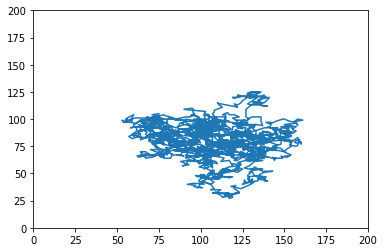

In [17]:
plt.plot(rw.trajectory[:TIME,1], rw.trajectory[:TIME,0])
plt.xlim(0,200)
plt.ylim(0,200)

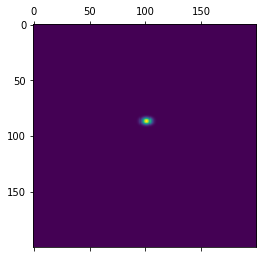

In [18]:
plt.matshow(rw.stepping_prob)

# Evaluating some data

In [19]:
rw_eval = random_walk_model(parameters)

In [20]:
TIME=2000
lik = 0
for t in range(TIME):
  lik += rw_eval.evolve_step(sim=False, dat=rw.trajectory[t,:])
lik
  

-9302.300849052535

In [21]:
class gridsearch_dat():
  def __init__(self, ps, actual, grid):
    self.name = ps
    self.actual = actual
    self.grid = grid
    self.res = None

In [22]:
sigma_i = gridsearch_dat("sigma_i", 2, [1.4,1.6,1.8,2, 2.2, 2.4])
sigma_j = gridsearch_dat("sigma_j", 3, [2.4,2.6,2.8,3, 3.2, 3.4])
gs_list = [sigma_i, sigma_j]

In [69]:
#just to be safe
pdict = parameters.copy()

In [24]:
sim_dat = rw.trajectory[:TIME,:]

In [25]:
sim_dat = np.expand_dims(sim_dat, axis=0)

In [26]:
for p in gs_list:
    res = rec.grid_search(p.grid, p.name, sim_dat, pdict)
    p.res = res

In [67]:
def plot_gs(P):
  fig, ax = plt.subplots(figsize= (35,10))
  for tr in range(3):
      ax.axvline(P.actual, c="red", lw=5)
      ax.plot(P.grid, P.res, ".-", c="black")
      fpname = P.name
      ax.set_title(f"{fpname}", fontsize=35)
      ax.set_xlabel(f"Parameter Value", fontsize=20, color="grey")
      ax.set_ylabel(f"Likelihood", fontsize=20, color="grey")
      ax.tick_params(axis='both', labelsize=20,labelcolor="grey", color="grey")
      ax.annotate(f"actual={P.actual}", (P.actual, np.median(P.res)), size=30, color="red")
  return fig, ax

mpl.rcParams["axes.prop_cycle"]=mpl.cycler(color=["slateblue","rebeccapurple","orchid"])
mpl.rc('axes',edgecolor='grey')

sigma_i
sigma_j


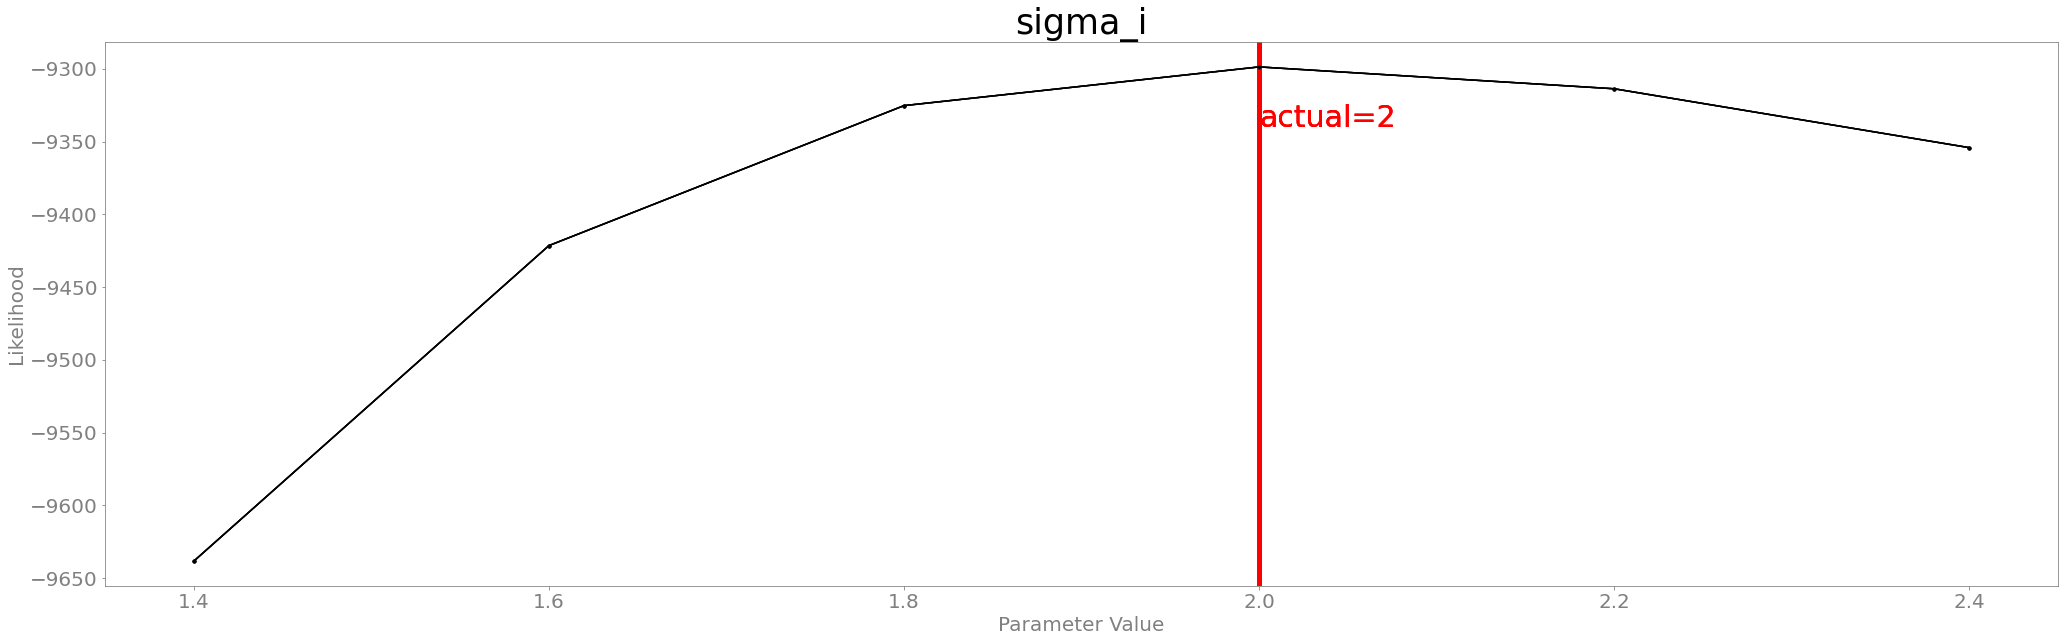

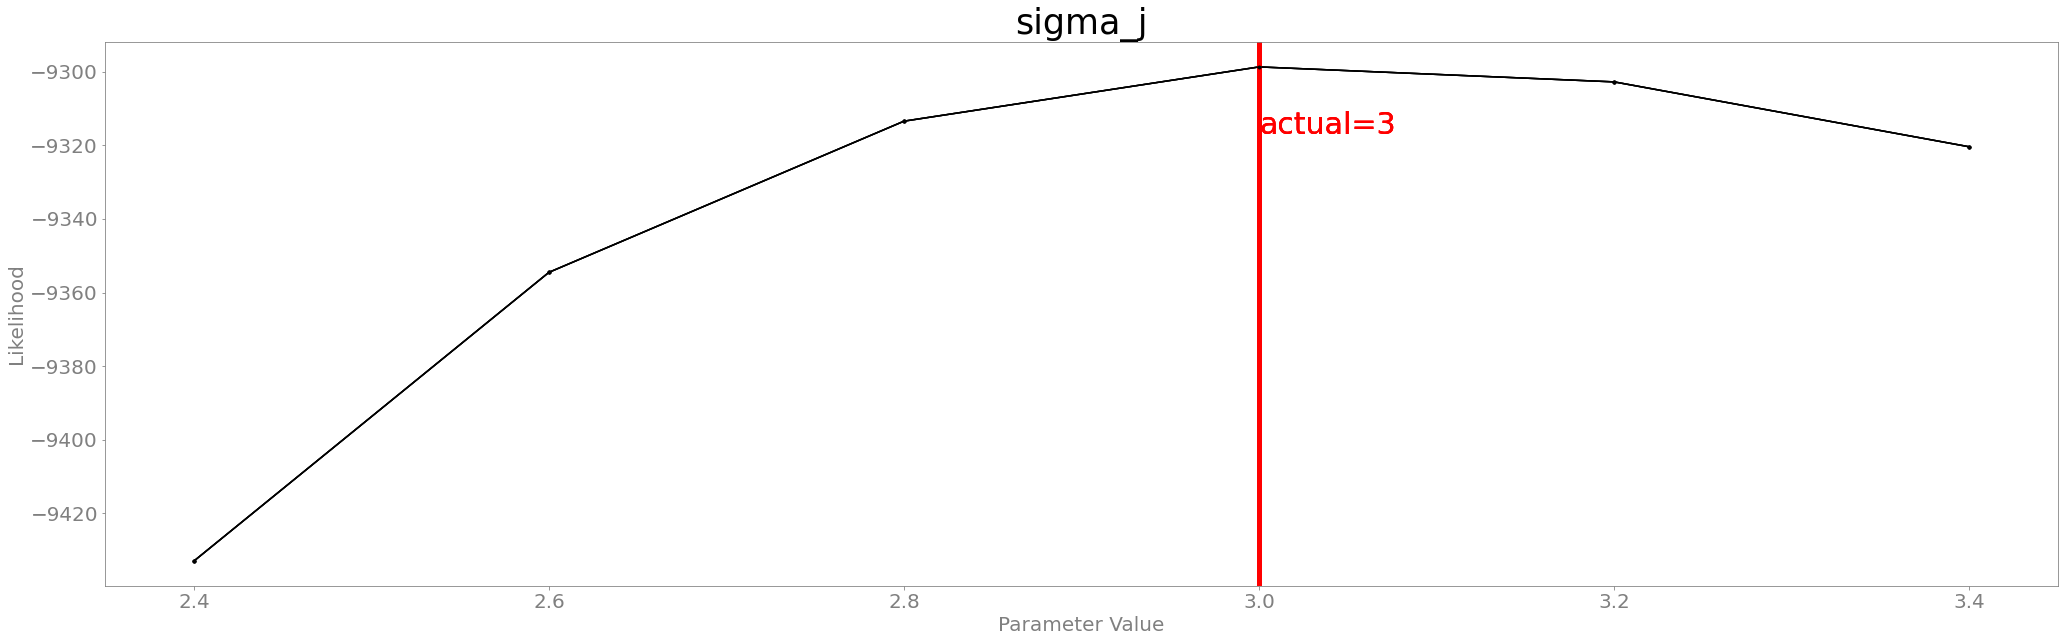

In [68]:
with PdfPages('param_rec.pdf') as pdf:
    for P in gs_list:
        print(P.name)
        fig, ax = plot_gs(P)
        pdf.savefig(fig)